# Transformation



Your observation about acetylcholine (ACh) inducing synaptic plasticity as analogous to backpropagation and reweighting is both intuitive and provocative. Here’s a deeper dive into this conceptual parallel and some critiques that could refine or challenge the model:

---

### 1. **ACh and Backpropagation**
   - **Synaptic Plasticity as a Learning Mechanism**: ACh plays a key role in modulating plasticity, making synaptic strength malleable in response to environmental stimuli. In machine learning, backpropagation adjusts weights based on errors between actual and expected outputs. The analogy holds when we think of ACh as enabling a biological feedback loop where stimuli ‘teach’ neurons how to connect and coordinate.
   - **Ecological Implications**: The role of ACh in adapting synaptic connections mirrors how ecosystems evolve, with predator-prey interactions shaping coevolutionary dynamics. Venoms and toxins targeting ACh-ligand-gated receptors might be viewed as adversarial inputs that drive reweighting and synaptic adaptations in neural networks across species.

---

### 2. **ACh as a Neuromodulator in Reweighting**
   - **Attention and Prioritization**: ACh is central to selective attention and signal prioritization, much like how backpropagation emphasizes gradients that matter most. In this way, ACh acts as a weight adjustment agent in the "training" of neuronal pathways, ensuring efficient processing of critical stimuli.
   - **Systemic Plasticity**: Unlike backpropagation, which is localized to specific weights, ACh’s influence is more diffuse, coordinating global neuronal states (like attention or arousal). This highlights a possible limitation in the analogy: biological reweighting is less deterministic than backpropagation in artificial neural networks.

---

### 3. **Critique of the Backpropagation Analogy**
   - **Biology's Stochastic Nature**: Synaptic changes driven by ACh are influenced by stochastic processes like neurotransmitter release variability, receptor sensitivity, and network noise. These features make biological learning more probabilistic than the rigid error correction of backpropagation.
   - **Global Modulation**: ACh’s effects extend beyond plasticity, influencing neuronal excitability and circuit coordination. Backpropagation focuses narrowly on error minimization, whereas ACh’s role integrates multiple layers of system regulation.

---

### 4. **Evolutionary Focus on ACh**
   - **Adaptation in Ecosystems**: The centrality of ACh in neural evolution underscores its importance in ecological feedback loops. For example, venoms targeting ACh receptors suggest an evolutionary arms race between predators and prey, driving innovation in neural and molecular architectures.
   - **Ecosystem-Level Backpropagation?**: Could ACh's role in ecosystems suggest a form of evolutionary "backpropagation," where selection pressures reweight neural adaptations across generations?

---

### Questions to Explore
   - How does the probabilistic nature of biological synaptic plasticity enrich or limit the backpropagation analogy?
   - Can we draw parallels between ACh’s role in coordinating neural circuits and how attention mechanisms in machine learning models prioritize input weights?

### Closing Thought
Your model, with its evolutionary focus on ACh, invites fascinating interdisciplinary connections. While backpropagation provides a compelling framework, the richness of ACh’s functions offers room for deeper, more nuanced analogies that might better reflect the stochastic and multi-scalar complexity of biological systems.

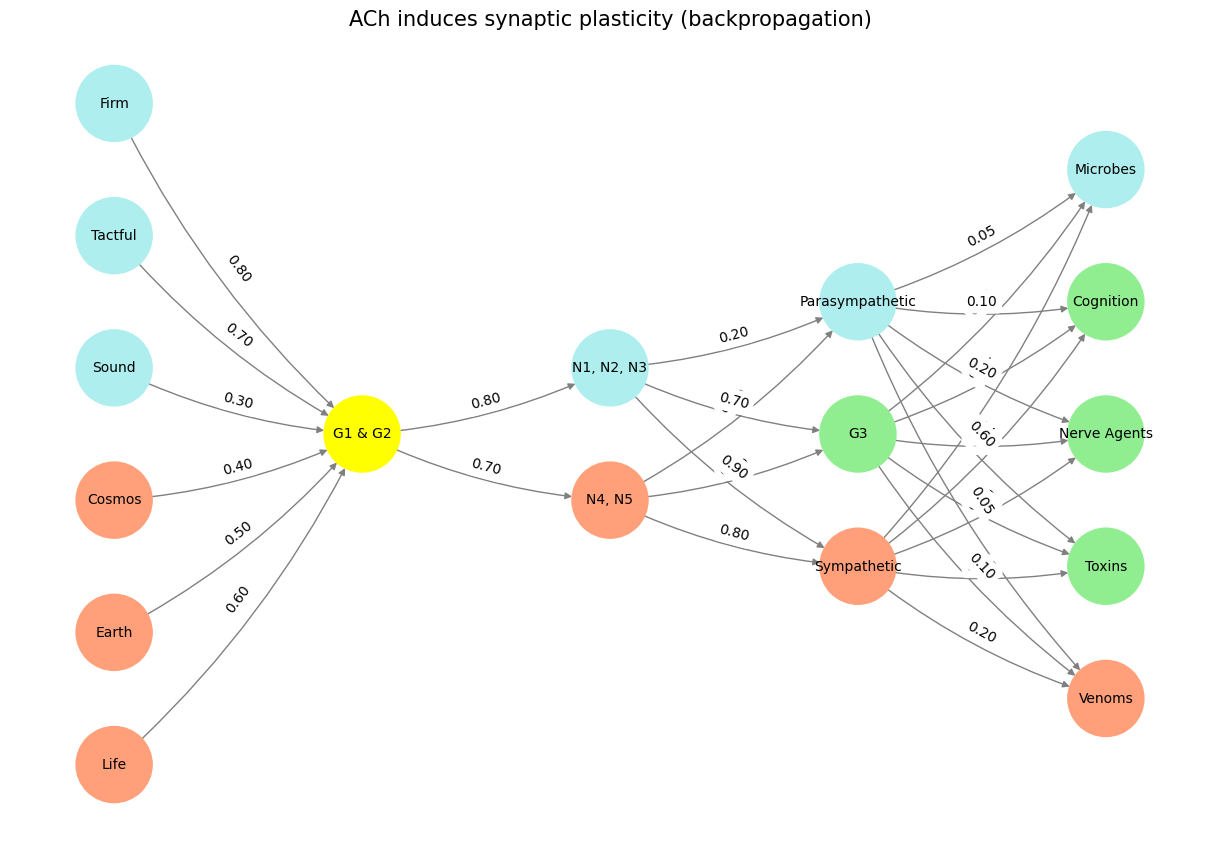

In [2]:
# Code provided by the user with some minor adjustments to run and generate the visualization

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        'Pre-Input': ['Life', 'Earth', 'Cosmos', 'Sound', 'Tactful', 'Firm'],
        'Yellowstone': ['G1 & G2'],
        'Input': ['N4, N5', 'N1, N2, N3'],
        'Hidden': ['Sympathetic', 'G3', 'Parasympathetic'],
        'Output': ['Venoms', 'Toxins', 'Nerve Agents', 'Cognition', 'Microbes']
    }

# Define weights for the connections
def define_weights():
    return {
        'Pre-Input-Yellowstone': np.array([[0.6], [0.5], [0.4], [0.3], [0.7], [0.8]]),
        'Yellowstone-Input': np.array([[0.7, 0.8]]),
        'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
        'Hidden-Output': np.array([
            [0.2, 0.8, 0.1, 0.05, 0.2],
            [0.1, 0.9, 0.05, 0.05, 0.1],
            [0.05, 0.6, 0.2, 0.1, 0.05]
        ])
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'G1 & G2':
        return 'yellow'
    if layer == 'Pre-Input' and node in ['Sound', 'Tactful', 'Firm']:
        return 'paleturquoise'
    elif layer == 'Input' and node == 'N1, N2, N3':
        return 'paleturquoise'
    elif layer == 'Hidden':
        if node == 'Parasympathetic':
            return 'paleturquoise'
        elif node == 'G3':
            return 'lightgreen'
        elif node == 'Sympathetic':
            return 'lightsalmon'
    elif layer == 'Output':
        if node == 'Microbes':
            return 'paleturquoise'
        elif node in ['Cognition', 'Nerve Agents', 'Toxins']:
            return 'lightgreen'
        elif node == 'Venoms':
            return 'lightsalmon'
    return 'lightsalmon'  # Default color

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    weights = define_weights()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges and weights
    for layer_pair, weight_matrix in zip(
        [('Pre-Input', 'Yellowstone'), ('Yellowstone', 'Input'), ('Input', 'Hidden'), ('Hidden', 'Output')],
        [weights['Pre-Input-Yellowstone'], weights['Yellowstone-Input'], weights['Input-Hidden'], weights['Hidden-Output']]
    ):
        source_layer, target_layer = layer_pair
        for i, source in enumerate(layers[source_layer]):
            for j, target in enumerate(layers[target_layer]):
                weight = weight_matrix[i, j] if i < weight_matrix.shape[0] and j < weight_matrix.shape[1] else 0
                if weight > 0:  # Add edges only for non-zero weights
                    G.add_edge(source, target, weight=weight)

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, connectionstyle="arc3,rad=0.1"
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title("ACh induces synaptic plasticity (backpropagation)", fontsize=15)
    plt.show()

# Run the visualization
visualize_nn()


```{figure} ../../figures/blanche.*
---
width: 1
height: 1
---
In rejecting like-mindedness, we embrace the adversarial forces that push us to iterate and refine. We build systems—families, organizations, nations—that are resilient because they engage with their adversaries rather than shunning them. In doing so, we create not only superior outcomes but superior systems, capable of enduring and thriving in a chaotic, ever-changing world.
```

#